# Kullback Leibler Divergence
- It's a metric used in information-theory to quantify how one probability distribution $P$ diverges from another probability distribution $Q$.
$$\begin{equation*} D_{KL}(P \parallel Q) = \sum_i^n P(i) \log \left(\frac{P(i)}{Q(i)}\right) \end{equation*}$$ where $n$ is the number of observations and $Q(i)\neq 0$.
- In some text-books, it's also referred to as relative-entropy.
- It's assymetric in nature. i.e, $D_{KL}(P \parallel Q)\neq D_{KL}(Q \parallel P)$.
## Example
Let's suppose we're given a dataset as to how many people like apple pie, orange pie and chocolate pie in 2 separate years.
|Year|Apple Pie|Orange Pie|Chocolate Pie|
|:-:|:-:|:-:|:-:|
|2024|120|80|200|
|2025|150|65|220|

Let's see if we can measure how much the data has changed from the year 2024 to 2025.
***
## Loading and visualizing the data

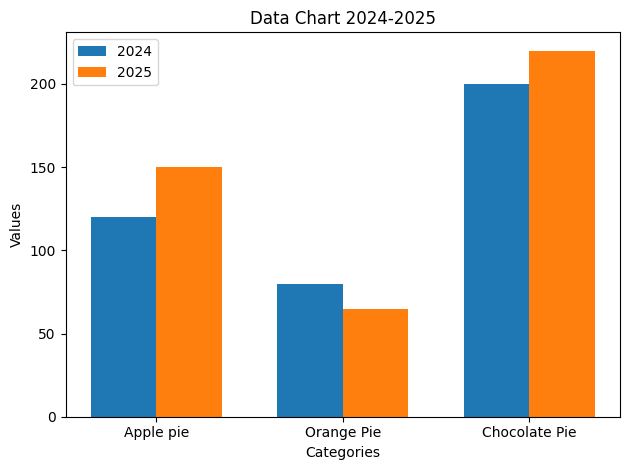

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
data_2024 = [120, 80, 200]
data_2025 = [150, 65, 220]
labels = ['Apple pie', 'Orange Pie', 'Chocolate Pie']

# Set the positions for the bars
x = np.arange(len(labels))  # Indices for x-axis (0, 1, 2, 3)
width = 0.35  # Width of each bar (adjust to control closeness)

# Create the figure and axis
fig, ax = plt.subplots()

# Plot the bars
ax.bar(x - width/2, data_2024, width, label = '2024', color = '#1f77b4')
ax.bar(x + width/2, data_2025, width, label = '2025', color = '#ff7f0e')

# Customize the plot
ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.set_title('Data Chart 2024-2025')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

## Implementing KL divergence

In [2]:
import numpy as np
from typing import List

# Normalize the arrays to create probability distributions
def normalize_array(arr: List[int], epsilon_: float = 1e-10) -> List[int]:
    arr_sum = np.sum(arr)
    if arr_sum == 0:
        raise ValueError("Array sum is zero, cannot normalize.")

    # Add small epsilon to avoid division by zero
    return (np.array(arr) + epsilon_) / (arr_sum + epsilon_ * len(arr))

# Compute KL divergence
def kl_divergence(p: List[int], q: List[int], epsilon_: float = 1e-10, normalize: bool = False) -> List[int]:
    normalized_p = (normalize_array(p) if normalize else np.array(p))
    normalized_q = (normalize_array(q) if normalize else np.array(q))

    # TODO: values less than epsilon are set to epsilon and values greater than 1 are set to 1
    if normalize:
        normalized_p = np.clip(normalized_p, epsilon_, 1)
        normalized_q = np.clip(normalized_q, epsilon_, 1)
    
    return np.sum(normalized_p * np.log(normalized_p / normalized_q))

## Driver code

In [3]:
kl_divergence(data_2024, data_2025, normalize = True)

0.010811201639907422

## Example 2

In [4]:
arr1 = [0.2, 0.3, 0.5]
arr2 = [0.25, 0.25, 0.5]

kl_divergence(arr1, arr2)

0.010067756775344432

***